## 1 | Importing the libraries

In [728]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

## 2 | Importing the Data

In [729]:
dataset = pd.read_csv("bodyfat.csv")
dataset

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [730]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Density,252.0,1.055574,0.019031,0.995,1.0414,1.0549,1.0704,1.1089
BodyFat,252.0,19.150794,8.368740,0.000,12.4750,19.2000,25.3000,47.5000
Age,252.0,44.884921,12.602040,22.000,35.7500,43.0000,54.0000,81.0000
Weight,252.0,178.924405,29.389160,118.500,159.0000,176.5000,197.0000,363.1500
Height,252.0,70.148810,3.662856,29.500,68.2500,70.0000,72.2500,77.7500
Neck,252.0,37.992063,2.430913,31.100,36.4000,38.0000,39.4250,51.2000
Chest,252.0,100.824206,8.430476,79.300,94.3500,99.6500,105.3750,136.2000
Abdomen,252.0,92.555952,10.783077,69.400,84.5750,90.9500,99.3250,148.1000
Hip,252.0,99.904762,7.164058,85.000,95.5000,99.3000,103.5250,147.7000
Thigh,252.0,59.405952,5.249952,47.200,56.0000,59.0000,62.3500,87.3000


This description suggests that there might be some outliers in the data. This can be eleminated by replacing the outliers' values with the mean of the column.

In [731]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


There is no NULL row, which is a good thing. No imputation required!

In [732]:
#dataset.drop(dataset.loc[dataset['BodyFat']<=5].index, inplace=True)

This can be used for future model, as BodyFat lower than 5% is very unhealthy and very difficult to maintain. Adding this was reduing the accuracy, so just for the experiment I commented the above line.

# 3 | Data Analysis

## 3.1 | Density

<Axes: >

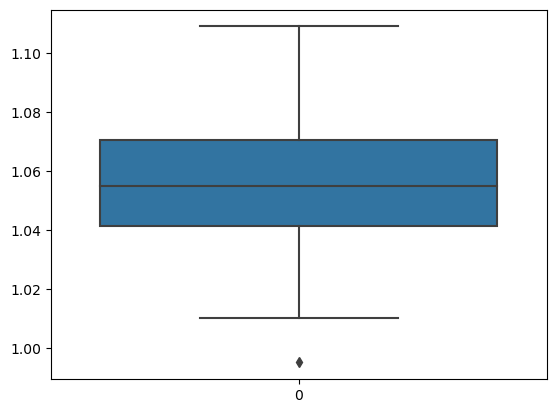

In [733]:
sns.boxplot(dataset['Density'])

In [734]:
dataset['Density'] = np.where(dataset['Density'] < 1.01 , dataset['Density'].mean() , dataset['Density'])

<Axes: xlabel='Density', ylabel='Density'>

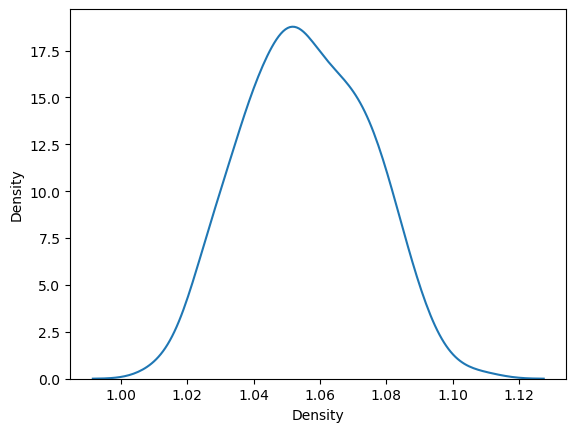

In [735]:
sns.kdeplot(dataset['Density'])

## 3.2 | Age

As age increases, body fat also increases as we lose muscles.

Age is directly proportional to Body fat percentage.

<Axes: >

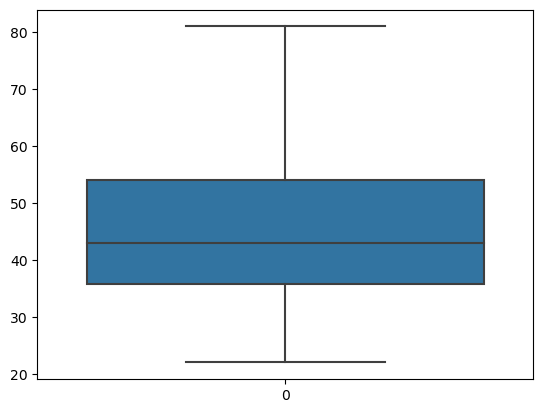

In [736]:
sns.boxplot(dataset['Age'])

<Axes: xlabel='Age', ylabel='Density'>

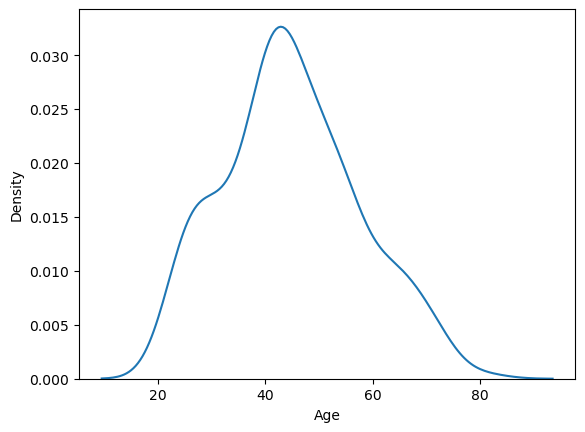

In [737]:
sns.kdeplot(dataset['Age'])

The data seems okay (no outliers).

## 3.3 | Weight

Higher the weight, higher the Body fat percentage.

Weight is directly proportional to Body fat percentage.

<Axes: >

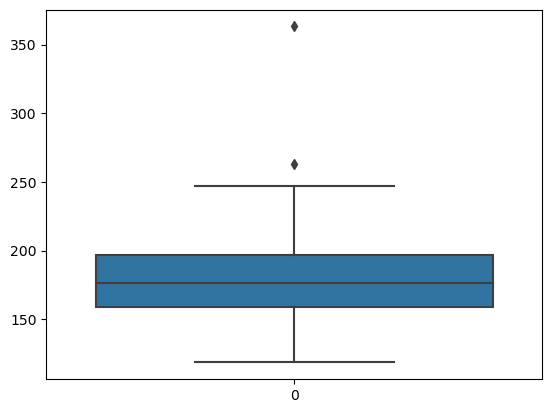

In [738]:
sns.boxplot(dataset['Weight'])

There appears to be outliers in the data.

Let's remove them by replacing the Weight value above 250 with the mean of the Weight column.

In [739]:
dataset['Weight'] = np.where(dataset['Weight'] > 250 , dataset['Weight'].mean() , dataset['Weight'])

<Axes: xlabel='Weight', ylabel='Density'>

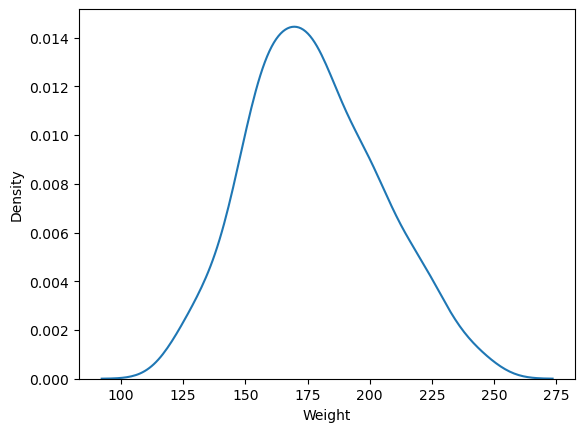

In [740]:
sns.kdeplot(dataset['Weight'])

Now, the Weight data looks good.

## 3.4 | Height

Taller people tend to have more Body fat percentage as well as the muscle mass.

Height is directly proportional to Body fat percentage.

<Axes: >

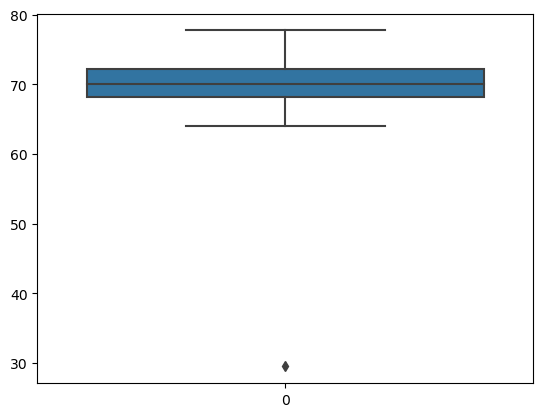

In [741]:
sns.boxplot(dataset['Height'])

There appears to be outliers in the data.

Let's remove them by replacing the Height value less than 30 with the mean of the Height column.

In [742]:
dataset['Height'] = np.where(dataset['Height'] < 30 , dataset['Height'].mean() , dataset['Height'])

<Axes: xlabel='Height', ylabel='Density'>

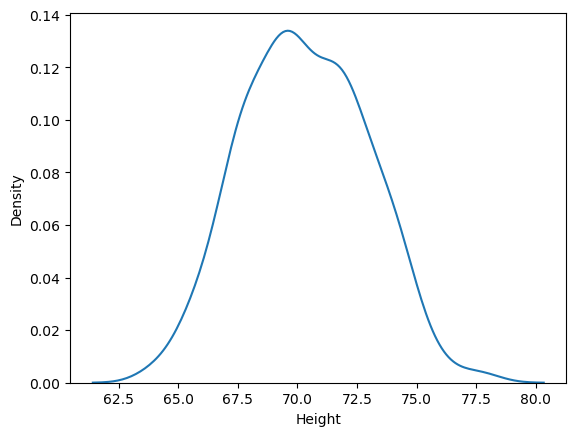

In [743]:
sns.kdeplot(dataset['Height'])

Now, the Height data looks good.

## 3.5 | Neck

Neck is directly proportional to Body fat percentage.

<Axes: >

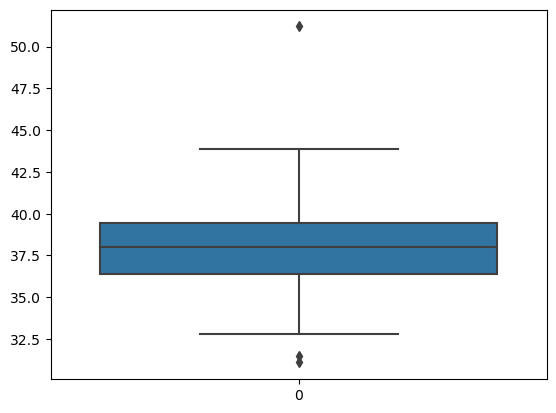

In [744]:
sns.boxplot(dataset['Neck'])

There appears to be outliers in the data.

Let's remove them by replacing the Neck values higher than 45 and the values lower than 32.5 with the mean of the Height column.

In [745]:
dataset['Neck'] = np.where(dataset['Neck'] < 32.5 , dataset['Neck'].mean() , dataset['Neck'])
dataset['Neck'] = np.where(dataset['Neck'] > 45 , dataset['Neck'].mean() , dataset['Neck'])

<Axes: xlabel='Neck', ylabel='Density'>

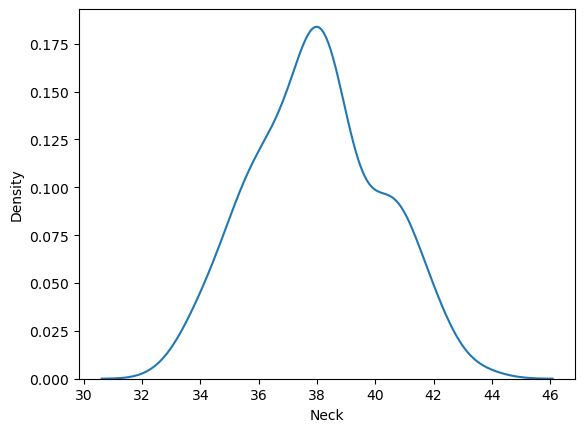

In [746]:
sns.kdeplot(dataset['Neck'])

Now, the Neck data looks good.

## 3.6 | Chest

Fat storage in chest is different for every individual. But for majority a larger chest means a higher body fat percentage.

Chest is directly proportional to Body fat percentage.

<Axes: >

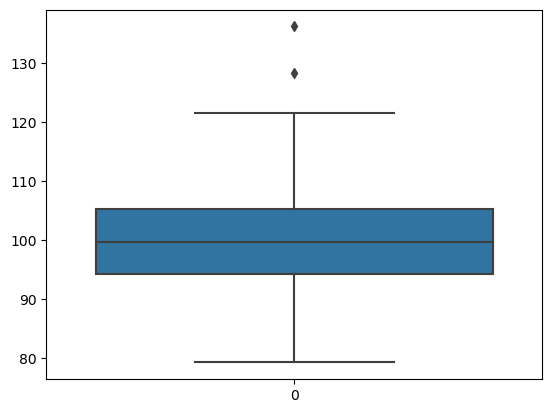

In [747]:
sns.boxplot(dataset['Chest'])

There appears to be outliers in the data.

Let's remove them by replacing the Chests value higher than 125 with the mean of the Chest column.

In [748]:
dataset['Chest'] = np.where(dataset['Chest'] > 125 , dataset['Chest'].mean() , dataset['Chest'])

<Axes: xlabel='Chest', ylabel='Density'>

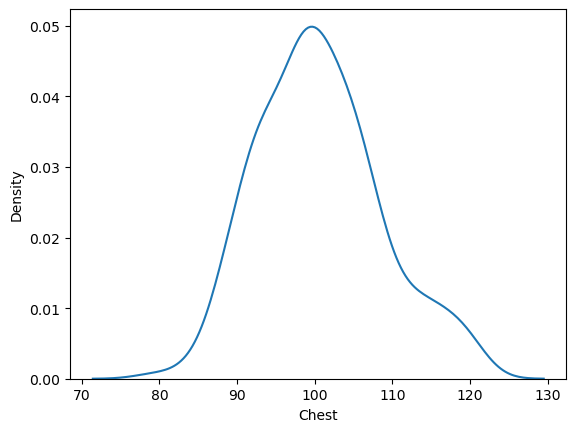

In [749]:
sns.kdeplot(dataset['Chest'])

Now, the Chest data looks good.

## 3.7 | Abdomen

There are a lot of vital organs surronding the Abdomen area, and a large abdomen circumference usually denotes a higher percentage of a type of fat, called viceral fat, which surronds the organs.

Abodomen is directly proportional to Body fat percentage.

<Axes: >

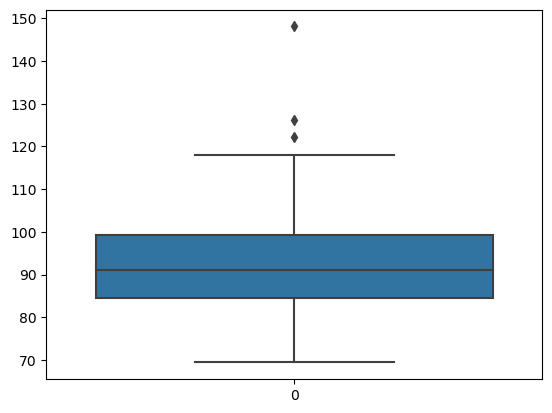

In [750]:
sns.boxplot(dataset['Abdomen'])

There appears to be outliers in the data.

Let's remove them by replacing the Abdomen values higher than 120 with the mean of the Abdomen column.

In [751]:
dataset['Abdomen'] = np.where(dataset['Abdomen'] > 120 , dataset['Abdomen'].mean() , dataset['Abdomen'])

<Axes: xlabel='Abdomen', ylabel='Density'>

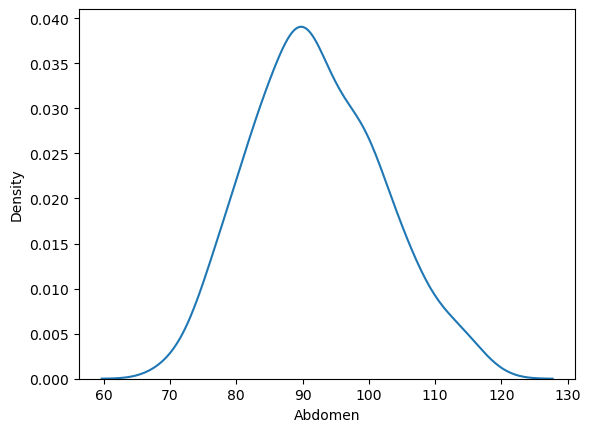

In [752]:
sns.kdeplot(dataset['Abdomen'])

Now, the Abdomen data looks good.

## 3.8 | Hip

Although it is completely based on genetics, but major studies have shown that females tend to store more fat around the hip area than males.

Hip is directly proportional to Body fat percentage.

<Axes: >

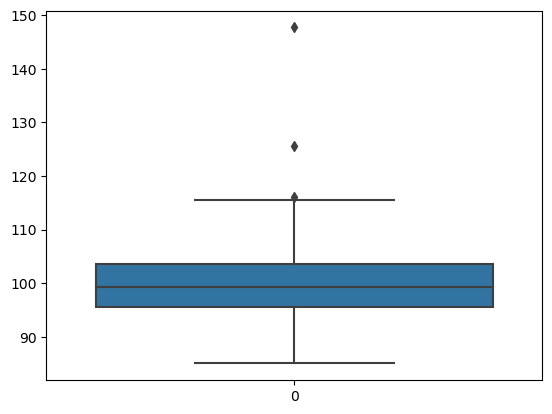

In [753]:
sns.boxplot(dataset['Hip'])

There appears to be outliers in the data.

Let's remove them by replacing the Hip values higher than 115 with the mean of the Hip column.

In [754]:
dataset['Hip'] = np.where(dataset['Hip'] > 115 , dataset['Hip'].mean() , dataset['Hip'])

<Axes: xlabel='Hip', ylabel='Density'>

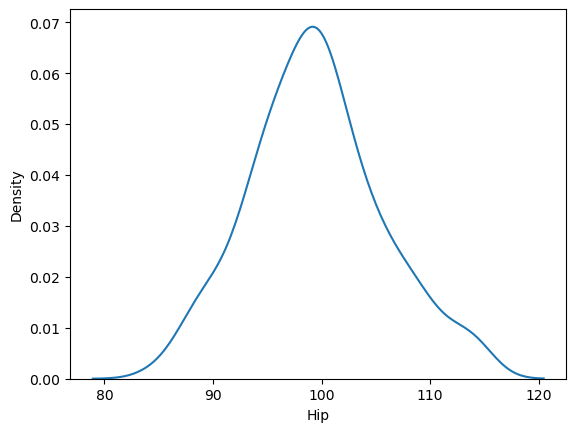

In [755]:
sns.kdeplot(dataset['Hip'])

Now, the Hip data looks good.

## 3.9 | Thigh

Thigh circumference and Body fat percentage does not have a direct relation. Large circumference of thigh can alse mean that the individual have more muscle mass.

<Axes: >

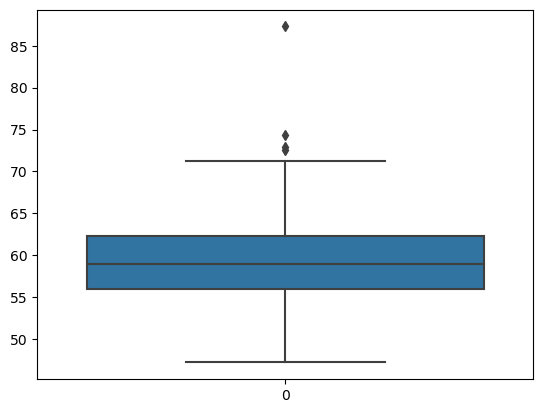

In [756]:
sns.boxplot(dataset['Thigh'])

There appears to be outliers in the data.

Let's remove them by replacing the Thigh values higher than 70 with the mean of the Thigh column.

In [757]:
dataset['Thigh'] = np.where(dataset['Thigh'] > 70 , dataset['Thigh'].mean() , dataset['Thigh'])

<Axes: xlabel='Thigh', ylabel='Density'>

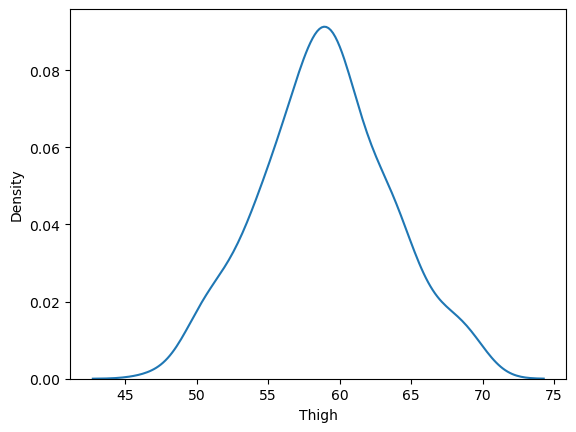

In [758]:
sns.kdeplot(dataset['Thigh'])

Now, the Weight data looks good.

## 3.10 | Knee

Knee is not a perfect measure of Body fat percentage, but it is seen that people with higher body percentage have a larger knee circumference.

<Axes: >

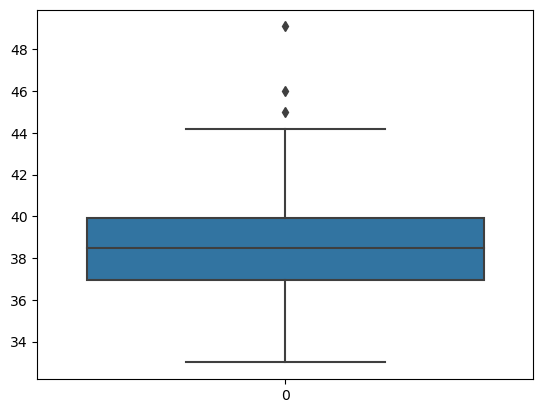

In [759]:
sns.boxplot(dataset['Knee'])

There appears to be outliers in the data.

Let's remove them by replacing the Knee values higher than 44 with the mean of the Knee column.

In [760]:
dataset['Knee'] = np.where(dataset['Knee'] > 44 , dataset['Knee'].mean() , dataset['Knee'])

<Axes: xlabel='Knee', ylabel='Density'>

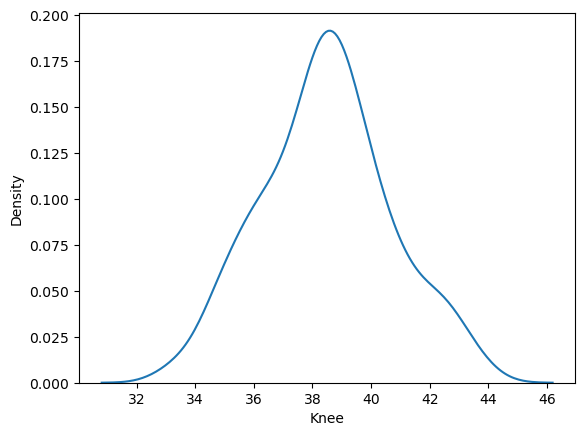

In [761]:
sns.kdeplot(dataset['Knee'])

Now, the Knee data looks good.

## 3.11 | Ankle

Same as knee, Ankle does not have a meaningful relation with Body Fat percentage.

<Axes: >

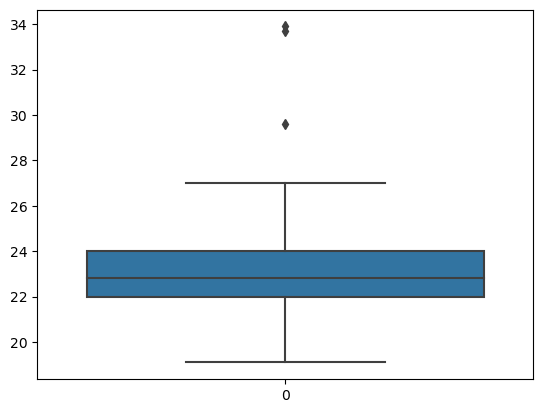

In [762]:
sns.boxplot(dataset['Ankle'])

There appears to be outliers in the data.

Let's remove them by replacing the Ankle values higher than 29 with the mean of the Ankle column.

In [763]:
dataset['Ankle'] = np.where(dataset['Ankle'] > 29 , dataset['Ankle'].mean() , dataset['Ankle'])

<Axes: xlabel='Ankle', ylabel='Density'>

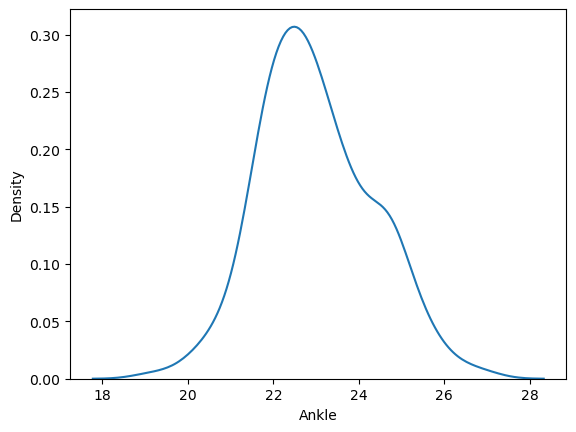

In [764]:
sns.kdeplot(dataset['Ankle'])

Now, the Ankle data looks good.

## 3.12 | Biceps

Same as Thigh circumference, large biceps circumference can not assure that the individual have a higher body percentage.

<Axes: >

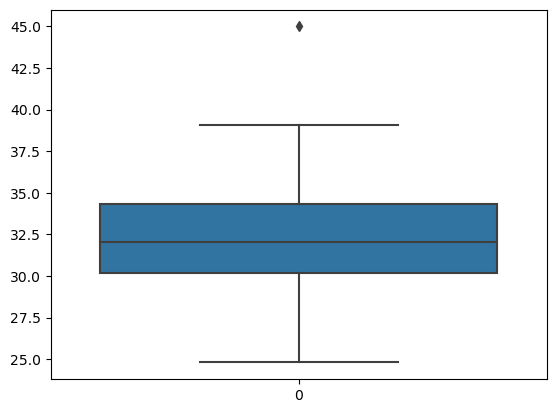

In [765]:
sns.boxplot(dataset['Biceps'])

There appears to be outliers in the data.

Let's remove them by replacing the Biceps values higher than 40 with the mean of the Biceps column.

In [766]:
dataset['Biceps'] = np.where(dataset['Biceps'] > 40 , dataset['Biceps'].mean() , dataset['Biceps'])

<Axes: xlabel='Biceps', ylabel='Density'>

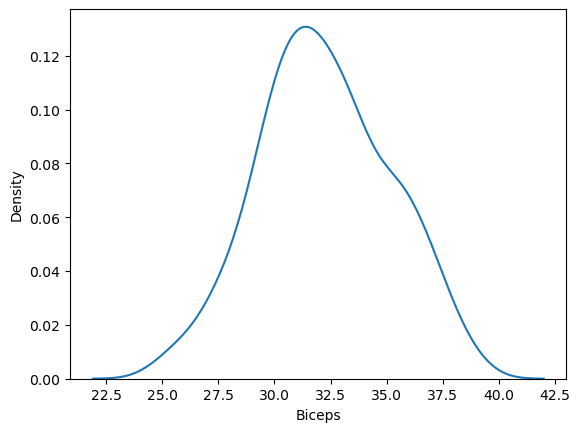

In [767]:
sns.kdeplot(dataset['Biceps'])

Now, the Biceps data looks good.

## 3.13 | Forearm

Forearm circumference can be directly proportional to Body fat percentage.

<Axes: >

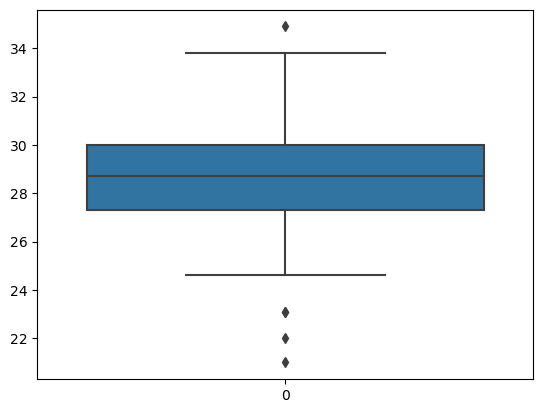

In [768]:
sns.boxplot(dataset['Forearm'])

There appears to be outliers in the data.

Let's remove them by replacing the Forearms value higher than 34 and values lower than 24 with the mean of the Forearm column.

In [769]:
dataset['Forearm'] = np.where(dataset['Forearm'] > 34 , dataset['Forearm'].mean() , dataset['Forearm'])
dataset['Forearm'] = np.where(dataset['Forearm'] < 24 , dataset['Forearm'].mean() , dataset['Forearm'])

<Axes: xlabel='Forearm', ylabel='Density'>

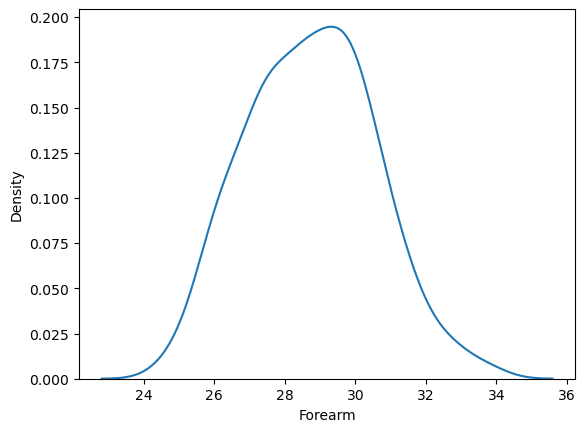

In [770]:
sns.kdeplot(dataset['Forearm'])

Now, the Forearm data looks good.

## 3.14 | Wrist

Wrist circumference can be directly proportional to Body fat percentage.

<Axes: >

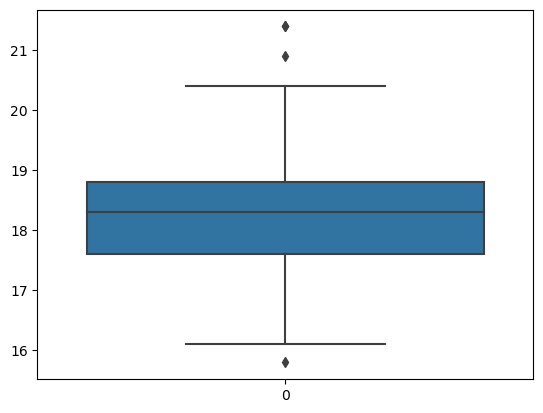

In [771]:
sns.boxplot(dataset['Wrist'])

There appears to be outliers in the data.

Let's remove them by replacing the Wrist values higher than than 20 and values lower than 16 with the mean of the Wrist column.

In [772]:
dataset['Wrist'] = np.where(dataset['Wrist'] > 20 , dataset['Wrist'].mean() , dataset['Wrist'])
dataset['Wrist'] = np.where(dataset['Wrist'] < 16 , dataset['Wrist'].mean() , dataset['Wrist'])

<Axes: xlabel='Wrist', ylabel='Density'>

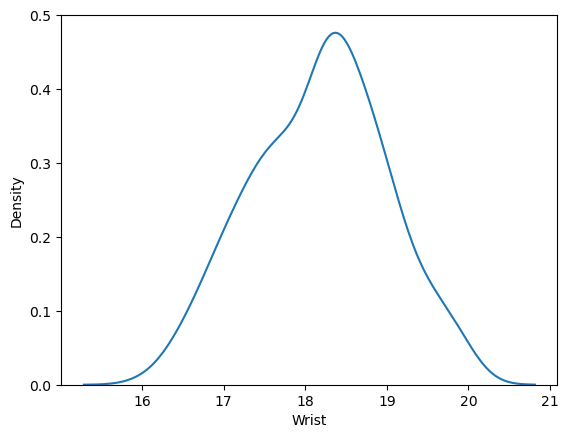

In [773]:
sns.kdeplot(dataset['Wrist'])

Now, the Wrist data looks good.

## 3.15 | Correlation matrix

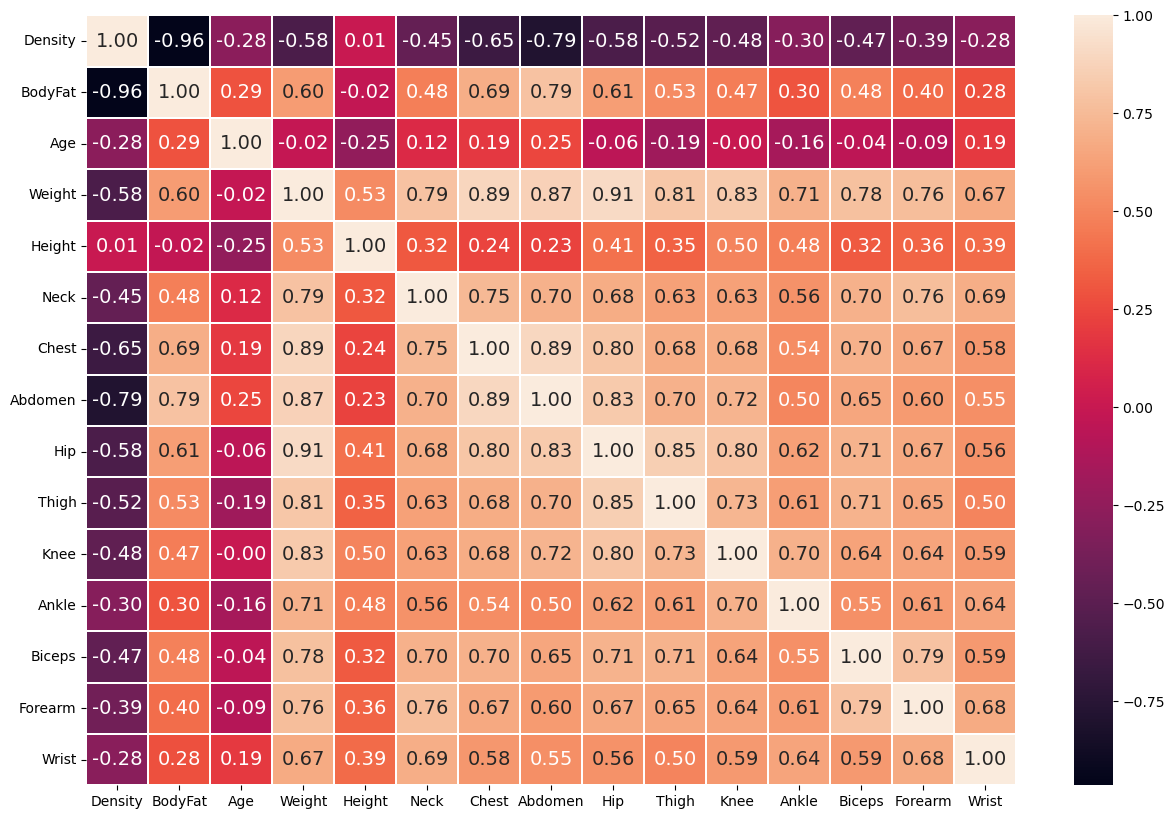

In [774]:
plt.figure(figsize = (15,10))
sns.heatmap(dataset.corr(), annot=True, linewidths=0.1, annot_kws={"fontsize":14}, fmt='.2f');

Height displayed a weak correlation. But, I decided to keep the column as human beings are very complex.

In [775]:
dataset.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

# 4 | Data preprocessing

Since there are no NULL values, we won't have to do any imputations.

We will now split the Dataset into training and test data.

In [776]:
X = dataset.drop("BodyFat" , axis = 1).values
y = dataset["BodyFat"].values

In [777]:
print(X)

[[  1.0708     23.        154.25      ...  32.         27.4
   17.1      ]
 [  1.0853     22.        173.25      ...  30.5        28.9
   18.2      ]
 [  1.0414     22.        154.        ...  28.8        25.2
   16.6      ]
 ...
 [  1.0328     72.        186.75      ...  31.3        27.2
   18.       ]
 [  1.0399     72.        190.75      ...  30.5        29.4
   19.8      ]
 [  1.0271     74.        207.5       ...  33.7        30.
   18.2297619]]


In [778]:
print(y)

[12.3  6.1 25.3 10.4 28.7 20.9 19.2 12.4  4.1 11.7  7.1  7.8 20.8 21.2
 22.1 20.9 29.  22.9 16.  16.5 19.1 15.2 15.6 17.7 14.   3.7  7.9 22.9
  3.7  8.8 11.9  5.7 11.8 21.3 32.3 40.1 24.2 28.4 35.2 32.6 34.5 32.9
 31.6 32.   7.7 13.9 10.8  5.6 13.6  4.  10.2  6.6  8.   6.3  3.9 22.6
 20.4 28.  31.5 24.6 26.1 29.8 30.7 25.8 32.3 30.  21.5 13.8  6.3 12.9
 24.3  8.8  8.5 13.5 11.8 18.5  8.8 22.2 21.5 18.8 31.4 26.8 18.4 27.
 27.  26.6 14.9 23.1  8.3 14.1 20.5 18.2  8.5 24.9  9.  17.4  9.6 11.3
 17.8 22.2 21.2 20.4 20.1 22.3 25.4 18.  19.3 18.3 17.3 21.4 19.7 28.
 22.1 21.3 26.7 16.7 20.1 13.9 25.8 18.1 27.9 25.3 14.7 16.  13.8 17.5
 27.2 17.4 20.8 14.9 18.1 22.7 23.6 26.1 24.4 27.1 21.8 29.4 22.4 20.4
 24.9 18.3 23.3  9.4 10.3 14.2 19.2 29.6  5.3 25.2  9.4 19.6 10.1 16.5
 21.  17.3 31.2 10.  12.5 22.5  9.4 14.6 13.  15.1 27.3 19.2 21.8 20.3
 34.3 16.5  3.   0.7 20.5 16.9 25.3  9.9 13.1 29.9 22.5 16.9 26.6  0.
 11.5 12.1 17.5  8.6 23.6 20.4 20.5 24.4 11.4 38.1 15.9 24.7 22.8 25.5
 22.  17.

## 4.1 | Splitting the dataset into the Training set and Test set

In [779]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [780]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# 5 | Model Building

### 5.1 | Building the Linear Regression model

In [781]:
LR = LinearRegression()

### 5.2 | Fitting the model

In [782]:
LR.fit(X_train , y_train)

LinearRegression()

### 5.3 | Predicting the Test set results

In [783]:
y_pred = LR.predict(X_test)

### 5.4 | Calculating the accuracy using r2 score

In [784]:
print(LR , r2_score(y_test , y_pred))

LinearRegression() 0.9840257599101625


### Predicting my Body fat percentage

In [785]:
X_me = [1.026, 26, 217, 70, 40, 109, 109, 109, 62.5, 38.5, 20, 37.5, 30.5, 18]
print(LR.predict(sc.transform([X_me])))

[31.92296697]
